### Module 3: Introduction to Machine Learning with Python

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [137]:
df = pd.read_csv('/home/pydev/workflow/dt_learn_data_science/edureka/Python_Machine_Learning/ Python_ML_Training_AD/Introduction Machine Learning/FyntraCustomerData.csv')
df.head(2)

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


1. Compute -- Use seaborn to create a jointplot to compare the Time on Website
and Yearly Amount Spent columns. Is there a correlation?


In [138]:
# df.corr(numeric_only=True, method="pearson")

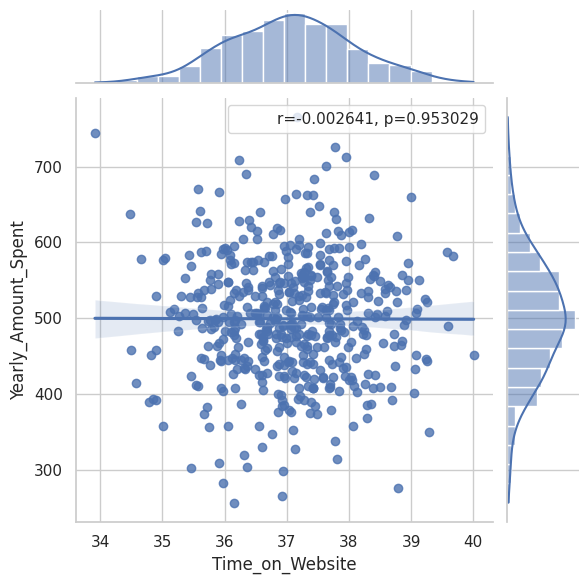

In [139]:
x     = df["Time_on_Website"]
y     = df["Yearly_Amount_Spent"]
graph = sns.jointplot(data=df, x= x, y= y, kind="reg")
r, p  = stats.pearsonr(x, y)
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
# Is there a correlation? : No.

2. Compute – Do the same as above but now with Time on App and Yearly
Amount Spent. Is this correlation stronger than 1st One?


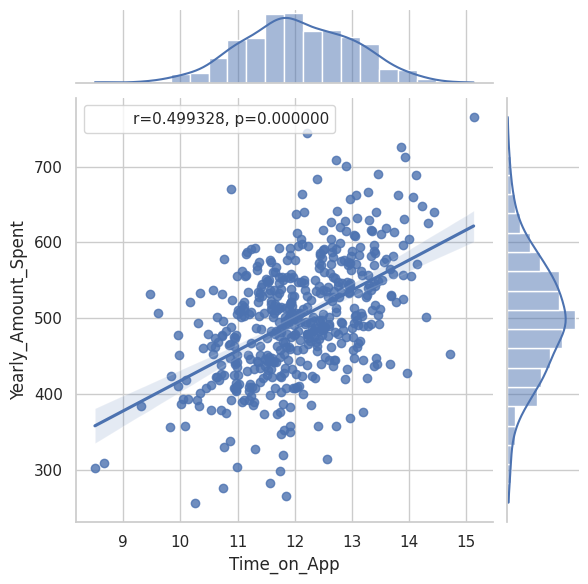

In [140]:
x     = df["Time_on_App"]
y     = df["Yearly_Amount_Spent"]
graph = sns.jointplot(data=df, x= x, y= y, kind="reg")
r, p  = stats.pearsonr(x, y)
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
# Is this correlation stronger than 1st One? : Yes

3. Compute -- Explore types of relationships across the entire data set using
pairplot . Based off this plot what looks to be the most correlated feature with
Yearly Amount Spent?


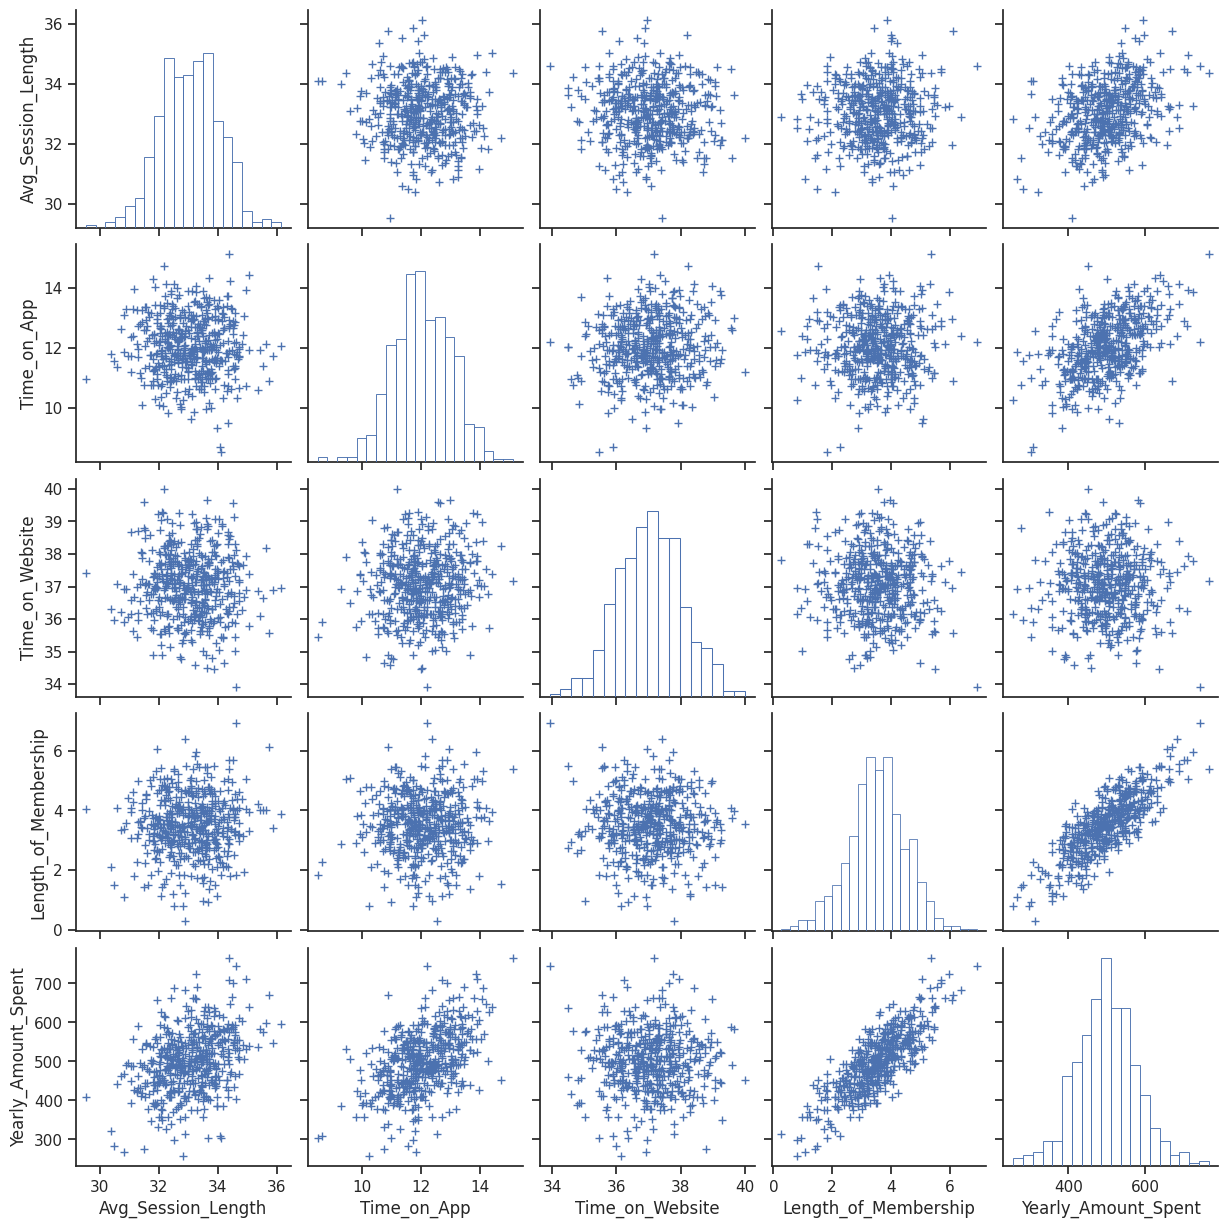

In [141]:
# sns.pairplot(df)
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(
    df,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)
plt.show()
# Based off this plot what looks to be the most correlated 
# feature with Yearly Amount Spent? : length of membership

4. Compute – Create linear model plot of Length of Membership and Yearly
Amount Spent. Does the data fits well in linear plot?


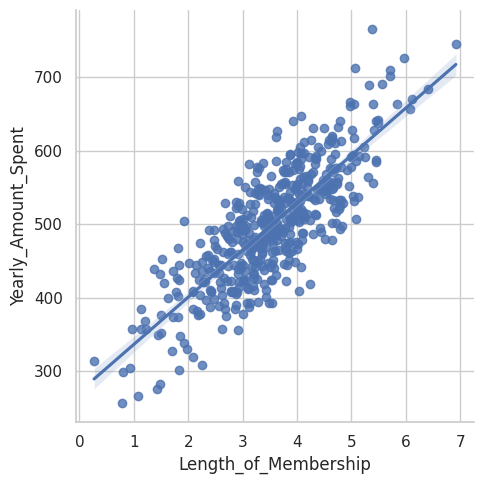

In [142]:
sns.set_style('whitegrid')
sns.lmplot(x ='Length_of_Membership', y ='Yearly_Amount_Spent', data = df)
# Does the data fits well in linear plot?: Y

5. Compute – Train and Test the data and answer multiple questions -- What is
the use of random_state=85?

In [143]:
X = np.array(df[["Length_of_Membership"]])
y = np.array(df[["Yearly_Amount_Spent"]])

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=85, test_size=0.3)
model = LinearRegression()
model.fit(xtrain, ytrain)


LinearRegression()

6. Compute – Predict the data and do a scatter plot. Check if actual and predicted
data match?


In [144]:
model.score(xtest, ytest)

0.6150624040337234

In [145]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(xtrain)
# Fit the resgression line using 'OLS'
lr = sm.OLS(ytrain, X_train_sm).fit()
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

array([271.26135617,  64.84222086])

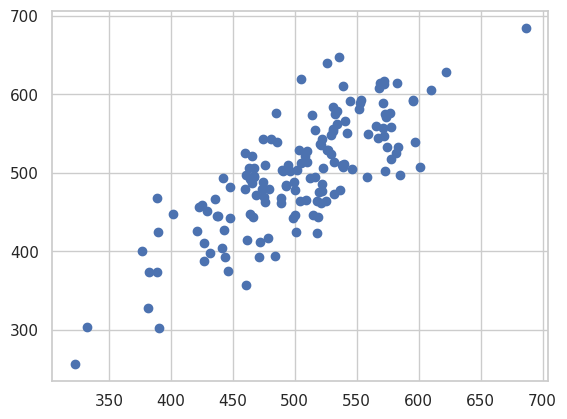

In [146]:
predicted_values = model.predict(xtest)
plt.scatter(predicted_values, ytest)
plt.show()

In [147]:
df_preds = pd.DataFrame({'Actual': ytest.squeeze(), 'Predicted': predicted_values.squeeze()})
df_preds.head(10)

,Actual,Predicted
0,444.053827,466.633075
1,554.003093,516.642027
2,302.189548,390.455020
3,536.130897,520.505057
4,497.513683,461.050661
5,473.360496,531.892740
6,446.418673,514.800269
7,578.986259,534.246877
8,463.591418,504.323433
9,592.688453,553.382587


7. What is the value of Root Mean Squared Error?

In [148]:
np.sqrt(mean_squared_error(ytest, predicted_values))

44.777320711114676

8. Final Question – Based on coefficients interpret company should focus more
on their mobile app or on their website

In [ ]:
# In mobile App